# Representações Vetoriais do Espaço (parte 1 de 2)

In [17]:
# importando algumas bibliotecas básicas

# numpy é uma biblioteca otimizada para tratar de arrays
import numpy as np

from typing import List
# matplotlib é um framework 9conjunto de bibliotecas) voltadas à visualização
# de dados (gráficos, mapas, animações, etc.)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib

## Círculos

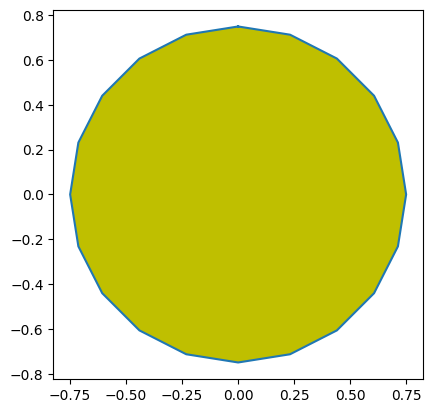

In [18]:

circle = patches.CirclePolygon((0, 0),
                       radius = 0.75,
                       fc = 'y')

plt.gca().add_patch(circle)

verts = circle.get_path().vertices
trans = circle.get_patch_transform()
points = trans.transform(verts)

plt.plot(points[:, 0], points[:, 1])
plt.axis('scaled')

plt.show()

## Retângulos

Coordenadas no SCR do axes: [[0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]]
Coordenadas no SCR dos dados: [[0.5 0.5]
 [2.5 0.5]
 [2.5 2.5]
 [0.5 2.5]
 [0.5 0.5]]


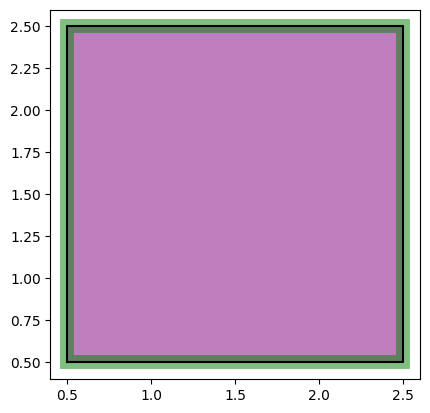

In [19]:

rect = patches.Rectangle((0.5, 0.5),
                        2, 2,
                        fc ='purple',
                        alpha=0.5,
                        ec ='g',
                        lw = 10)

plt.gca().add_patch(rect)

# obtendo os pontos do vértice
verts = rect.get_path().vertices
# obtendo a matriz de transformação afim (de coordenadas de display para data)
trans = rect.get_patch_transform()
points = trans.transform(verts)
print(f"Coordenadas no SCR do axes: {verts}")
print(f"Coordenadas no SCR dos dados: {points}")

# plotando as linhas de entorno do retângulo em color preta == 'k'
plt.plot(points[:, 0], points[:, 1], color="k")
plt.axis('scaled')

plt.show()

## Hexágono regular

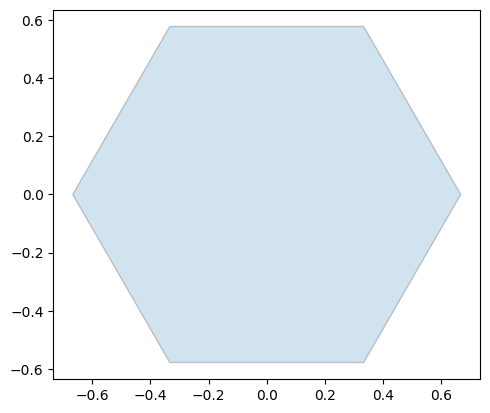

In [20]:

fig, ax = plt.subplots()
ax.set_aspect('equal')
hexagon = patches.RegularPolygon((0, 0),
                                     numVertices=6,
                                     radius=2. / 3.,
                                 orientation = np.radians(30),
                                     alpha=0.2, edgecolor='k')
ax.add_patch(hexagon)
plt.autoscale()
plt.show()


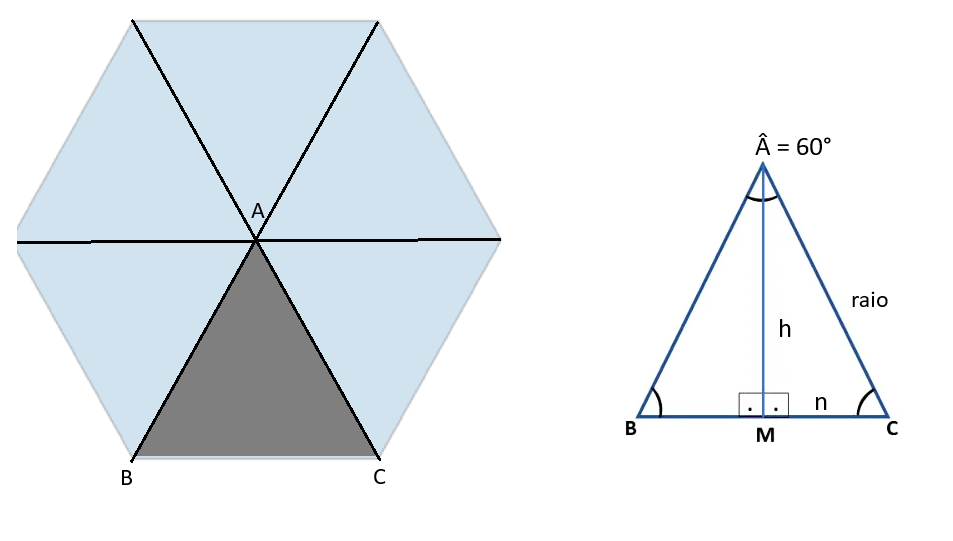


$\angle ABC = 60°$

$\vec{AC} = raio$

$M = 2 * n$

$n = \sin(\frac{\angle ABC}{2}) * raio$

$h = \cos(\frac{\angle ABC}{2}) * raio$

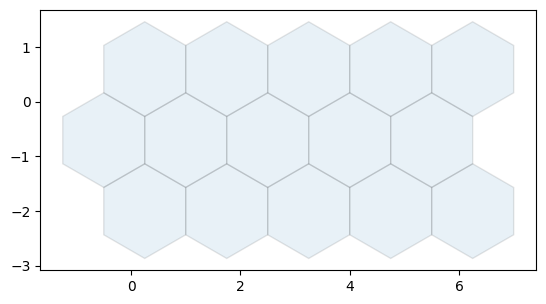

In [21]:
raio = 1.0
xmin = -2
ymin = -2
nVertices = 6
theta = 360/nVertices
n = (np.sin(np.radians(theta/2)) * raio)
M = n * 2
altura = (np.cos(np.radians(theta/2)) * raio)


offCoords = [[xmin+((M* 1.5) * 1.5),    ymin   + (altura * 1.5 * 0)],
             [xmin+((M* 1.5) * 2.5),    ymin   + (altura * 1.5 * 0)],
             [xmin+((M* 1.5) * 3.5),    ymin   + (altura * 1.5 * 0)],
             [xmin+((M* 1.5) * 4.5),    ymin   + (altura * 1.5 * 0)],
             [xmin+((M* 1.5) * 5.5),    ymin   + (altura * 1.5 * 0)],

             [xmin+((M* 1.5) * 1),      ymin   + (altura * 1.5 * 1)  ],
             [xmin+((M* 1.5) * 2),      ymin   + (altura * 1.5 * 1)  ],
             [xmin+((M* 1.5) * 3),      ymin   + (altura * 1.5 * 1)  ],
             [xmin+((M* 1.5) * 4),      ymin   + (altura * 1.5 * 1)  ],
             [xmin+((M* 1.5) * 5),      ymin   + (altura * 1.5 * 1)  ],

             [xmin+((M* 1.5) * 1.5),    ymin   + (altura * 1.5 * 2)  ],
             [xmin+((M* 1.5) * 2.5),    ymin   + (altura * 1.5 * 2)  ],
             [xmin+((M* 1.5) * 3.5),    ymin   + (altura * 1.5 * 2)  ],
             [xmin+((M* 1.5) * 4.5),    ymin   + (altura * 1.5 * 2)  ],
             [xmin+((M* 1.5) * 5.5),    ymin   + (altura * 1.5 * 2)  ],

             ]


def plotExagons(offCoords):
  fig, ax = plt.subplots(1)

  hexagons = []
  for c in offCoords:
      # fix radius here
      hexagon = patches.RegularPolygon((c[0], c[1]),
                                      numVertices=nVertices,
                                      radius = altura,
                                      alpha=0.1,
                                      edgecolor='k')
      ax.add_patch(hexagon)
      hexagons.append(hexagon)
  plt.autoscale()
  ax.set_aspect('equal')
  plt.show()
  return hexagons

hexagons = plotExagons(offCoords)

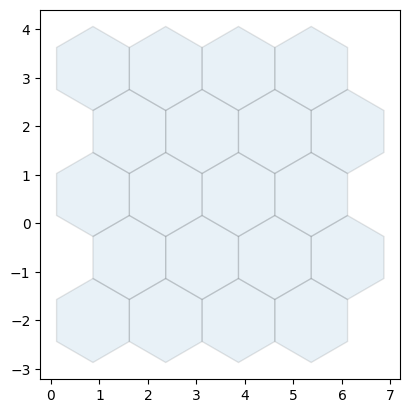

In [22]:
def gerarMalhaDePoligonosRegulares(raio = 1.0,
                                   xmin = -2,
                                   ymin = -2,
                                   nVertices = 6,
                                   nPoligonosNoEixoX = 5,
                                   nPoligonosNoEixoY = 4) -> List[patches.RegularPolygon]:


  theta = 360/nVertices
  n = (np.sin(np.radians(theta/2)) * raio)
  M = n * 2
  altura = (np.cos(np.radians(theta/2)) * raio)


  offCoords = []
  for ny in range(nPoligonosNoEixoY):
    for nx in range(nPoligonosNoEixoX):

      if (nx % 2) == 0:
        dx = 0
      else:
        dx = 0.5

      x = xmin + ((M * 1.5) * (ny + dx))
      y = ymin + (altura * 1.5 * nx)
      offCoords.append([x, y])

  hexagons = plotExagons(offCoords)

  return hexagons

# coordenadas
hexagons = gerarMalhaDePoligonosRegulares(M,altura)
